# Exercise 2: Visualizing and selecting Swarm data for modelling

This is a simple python (jupyter) notebook for reading Swarm L1B Mag cdf data files for starting Exercise 2 in DTU's MSc Earth and Planetary magnetism course.

In the following notebook it will be demonstrated how to carry out data selection on typical Swarm data products, and plot some relevant geomagnetic features.  Uses pandas for data manipulation

Requires one has installed the necessary packages in your environment (see EPM_environ.txt)

In [1]:
import cdflib
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.crs as ccrs
from lib.solar_emphemeris import *
import warnings 
warnings.filterwarnings('ignore')

/var/folders/r4/bgq3m75x16s79jqfmfwl57250jdywf/T/ipykernel_35948/817284781.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Define Paths and Files to read
DST_PATH = "Disturbance_Indices/Dst_MJD_1998.dat"
KP_PATH = "Disturbance_Indices/Kp_MJD_1998_QL.dat"
DATA_PATH = "Data/"

# (i) Load data

In [3]:
# Load in Dst and Kp indices:
time_Dst, Dst = np.loadtxt(DST_PATH, usecols=(0,1), comments='#',unpack=True)
time_Kp, Kp = np.loadtxt(KP_PATH, usecols=(0,1), comments='#',unpack=True)

# Put into pandas dataframe for easy access
Dst_indices = pd.DataFrame({'time_Dst': time_Dst, 'Dst': Dst})
Kp_indices = pd.DataFrame({'time_Kp': time_Kp, 'Kp': Kp})


In [4]:
# Load Swarm data
i = 0
dataframe = []  # create a temporary empty list

for folder, subfolder, files in os.walk(DATA_PATH):
    for file in sorted(list(files)):
        # if there is any non-cdf files in your folder they will be skipped:
        try:
            
            cdf_file = cdflib.CDF(folder + file)
            time_stamps = cdf_file.varget("Timestamp")  # CDF epoch is in miliseconds since 01-Jan-0000\n",
            print(folder + file)

            #tmp = (time_stamps - time_stamps[0]) / (1e3*60*60*24) + to_mjd2000(2018, 9, 14+i)
            mjd2000_time = (time_stamps - time_stamps[0]) / (1e3*60*60*24) + to_mjd2000(2018, 9, 14+i)  # 
            radii = cdf_file.varget("Radius")/1e3
            theta = 90 - cdf_file.varget("Latitude")
            phi = cdf_file.varget("Longitude")
            b_nec = cdf_file.varget("B_NEC")
            flags_b = cdf_file.varget("Flags_b")
            flags_q = cdf_file.varget("Flags_q")

            # append to list (list of dataframes)
            dataframe.append(pd.DataFrame({
                'time_stamp': mjd2000_time,
                'radius': radii,
                'colat': theta,
                'lon': phi,
                'X': b_nec[:, 0],
                'Y': b_nec[:, 1],
                'Z': b_nec[:, 2],
                'flags_b': flags_b,
                'flags_q': flags_q
            }))

            i += 1

        except OSError:
            print('Error could not open file:', "\n", file)
            pass

# save memory
del mjd2000_time, radii, theta, phi, b_nec, flags_q, flags_b
            
# convert list to single dataframe using pandas.concat
dataframe = pd.concat(dataframe, ignore_index=True)

print('shape of dataframe:', dataframe.shape)
dataframe.head(10)


Data/SW_OPER_MAGB_LR_1B_20180914T000000_20180914T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180915T000000_20180915T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180916T000000_20180916T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180917T000000_20180917T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180918T000000_20180918T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180919T000000_20180919T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180920T000000_20180920T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180921T000000_20180921T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180922T000000_20180922T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180923T000000_20180923T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180924T000000_20180924T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180925T000000_20180925T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180926T000000_20180926T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER

time_stamp      radius      colat         lon           X          Y  \
0  6831.000000  6871.86830  27.941087  123.608234  10403.1199 -2120.5559   
1  6831.000012  6871.85933  27.877814  123.615449  10370.9552 -2115.6103   
2  6831.000023  6871.85037  27.814542  123.622711  10338.8153 -2110.9086   
3  6831.000035  6871.84143  27.751270  123.630022  10306.7421 -2106.2247   
4  6831.000046  6871.83250  27.687999  123.637381  10274.7163 -2101.7993   
5  6831.000058  6871.82359  27.624729  123.644789  10242.5316 -2097.0032   
6  6831.000069  6871.81469  27.561460  123.652245  10210.4270 -2091.9564   
7  6831.000081  6871.80581  27.498192  123.659752  10178.1634 -2087.6542   
8  6831.000093  6871.79695  27.434925  123.667307  10146.8038 -2081.9889   
9  6831.000104  6871.78810  27.371658  123.674913  10114.7021 -2077.2174   

            Z  flags_b  flags_q  
0  46117.2698        0        0  
1  46130.9097        0        0  
2  46144.4124        0        0  
3  46157.8169        0        0  
4  46171.1290        0        0  
5  46184.3758        0        0  
6  46197.5425        0        0  
7  46210.6096        0        0  
8  46223.4304        0        0  
9  46236.3271        0        0

In [5]:
# drop nans, if any
dataframe = dataframe.dropna()

# check for error flags. Where flag_b or flag_q is 255

# drops rows where flag_b == 255
dataframe.drop(dataframe[dataframe.flags_b == 255].index, inplace=True)

# drops rows where flag_q == 255
dataframe.drop(dataframe[dataframe.flags_q == 255].index, inplace=True)

# (ii) Down-sample data

In [6]:
# Take every 60th datum
dataframe = dataframe.iloc[::60,:]
# Calculating the number of data rows before any filtering is applied and storing it as a variable.
pre_filtered_data_length = len(dataframe);

# (iii) Exploratory plots of vector field components vs co-latitude and time

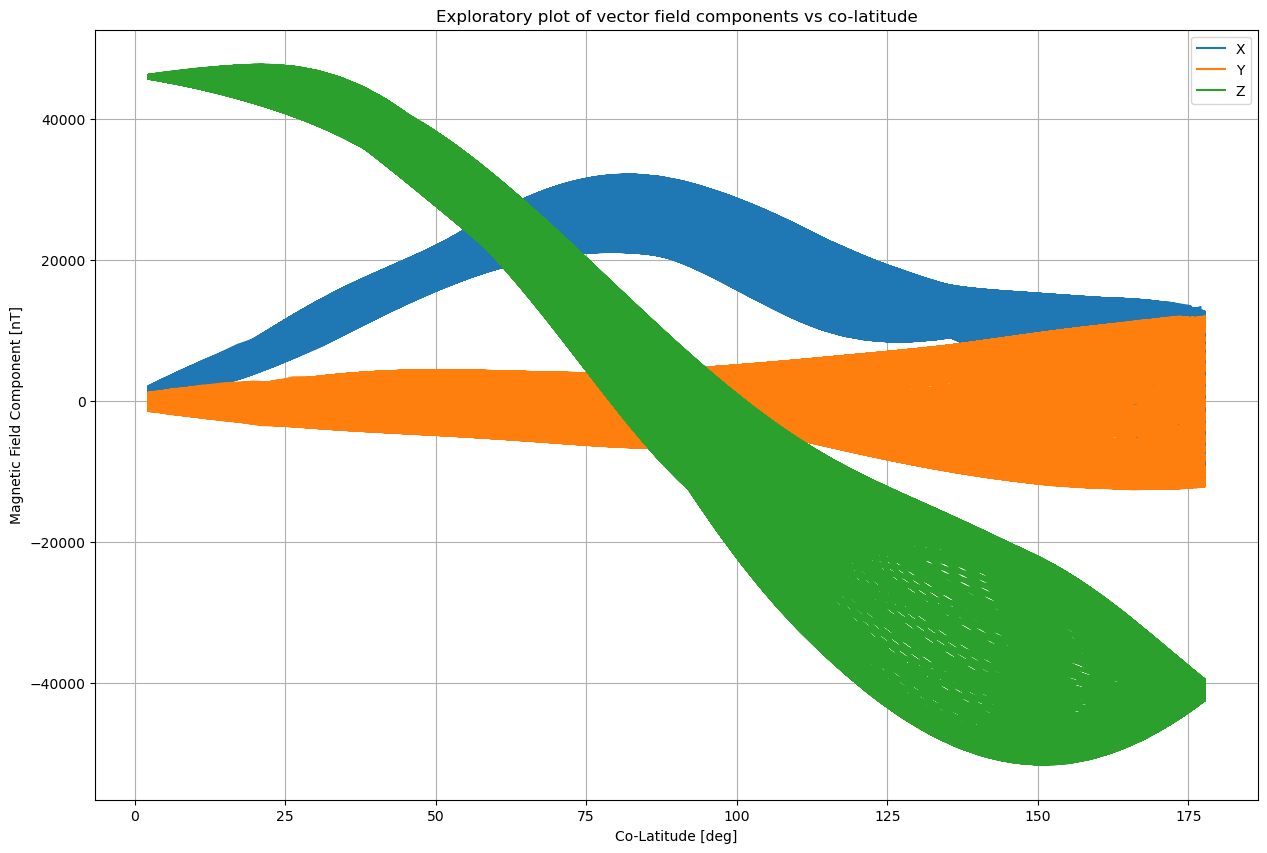

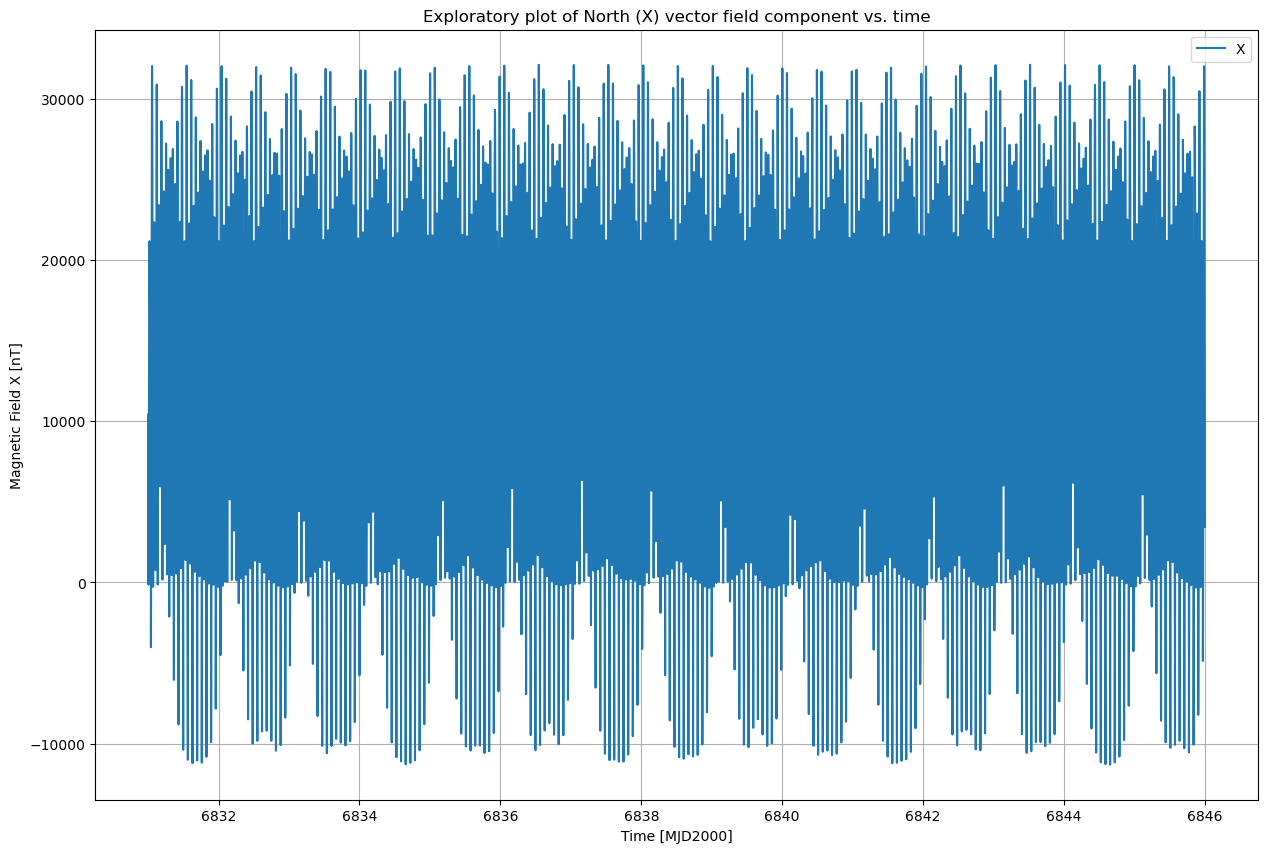

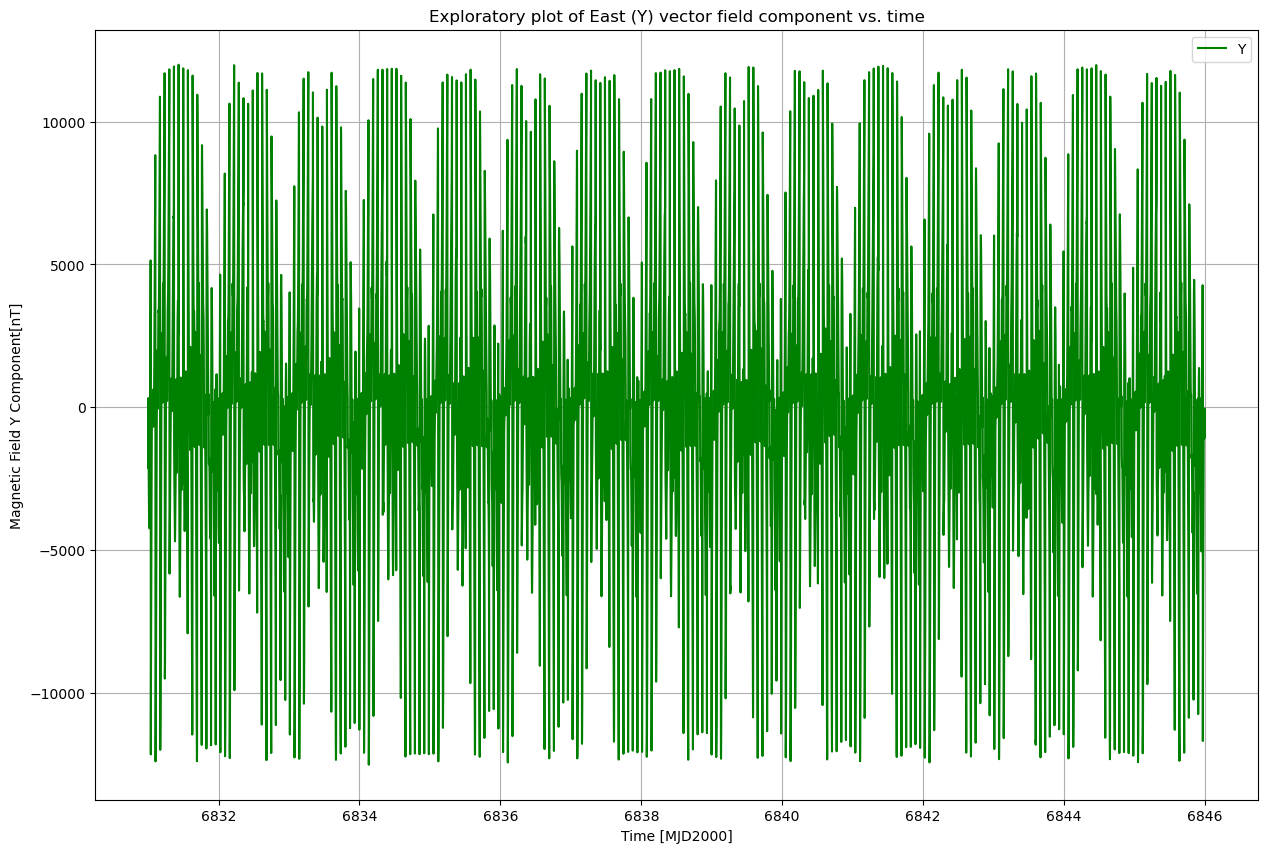

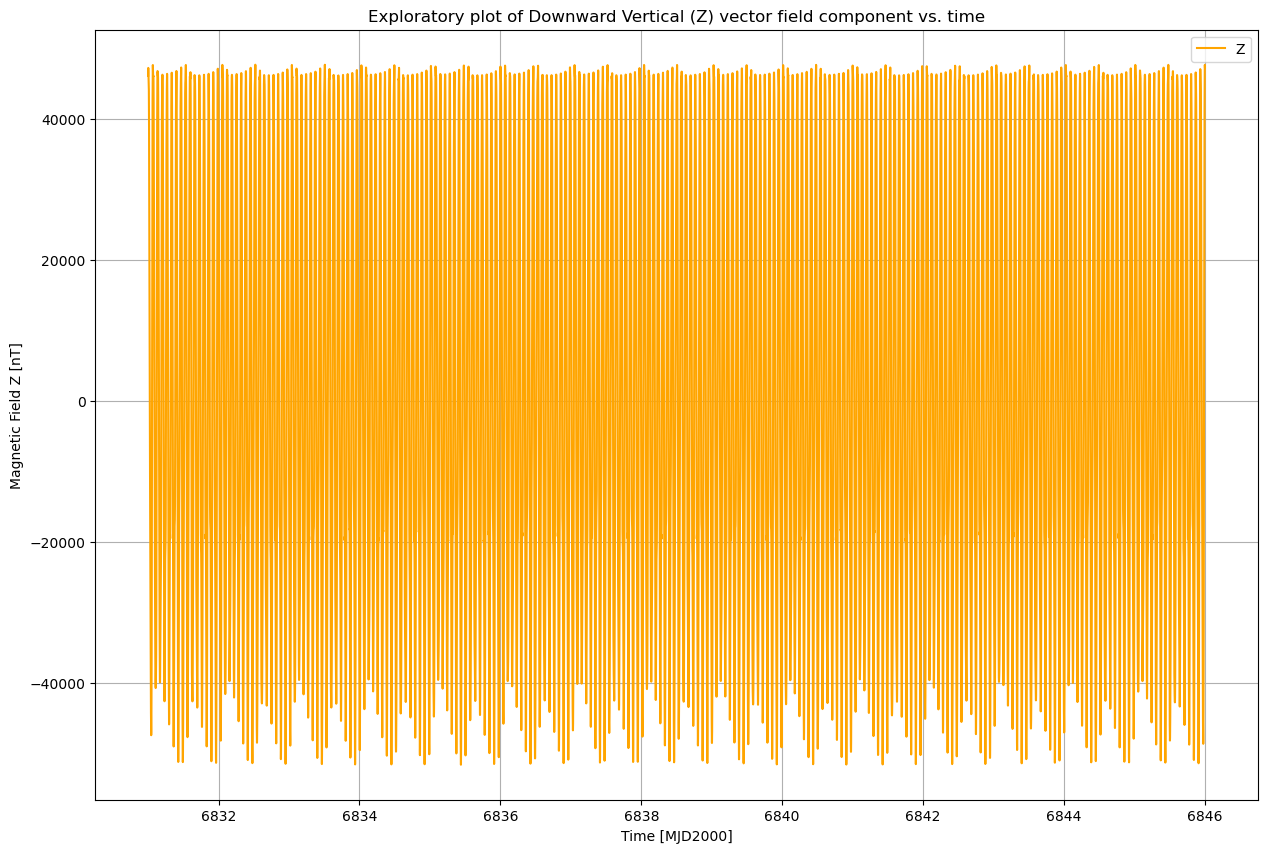

In [7]:
# Plot the vector field components against co-latitude and time.
dataframe.plot(x='colat',y=['X','Y','Z'],figsize=(15,10),grid=True,title='Exploratory plot of vector field components vs co-latitude',xlabel='Co-Latitude [deg]',ylabel='Magnetic Field Component [nT]');
dataframe.plot(x='time_stamp',y='X',figsize=(15,10),grid=True,title='Exploratory plot of North (X) vector field component vs. time', xlabel='Time [MJD2000]',ylabel='Magnetic Field X [nT]');
dataframe.plot(x='time_stamp',y='Y',figsize=(15,10),grid=True,color='green',title='Exploratory plot of East (Y) vector field component vs. time', xlabel='Time [MJD2000]',ylabel='Magnetic Field Y Component[nT]');
dataframe.plot(x='time_stamp',y='Z',figsize=(15,10),grid=True,color='orange', title='Exploratory plot of Downward Vertical (Z) vector field component vs. time', xlabel='Time [MJD2000]',ylabel='Magnetic Field Z [nT]');


# (iv) Remove Sunlight data

In [8]:
# removing sunlit data
rad = np.pi/180
zenith = 90-10  # zenith angle 80 deg

# threshold for dark time observation
cos_zeta_0 = np.cos((zenith) * rad)
_, declination = sun_mjd2000(dataframe.time_stamp.values)
cos_zeta = np.cos(dataframe.colat.values * rad) * np.sin(declination) \
         + np.sin(dataframe.colat.values * rad) * np.cos(declination) * np.cos(np.mod(dataframe.time_stamp.values + .5, 1) * 2*np.pi + dataframe.lon.values * rad)

# Calculating the sunlit angle in degrees.
zeta = np.arccos(cos_zeta)*(1/rad);

# Adding the sunlit angle corresponding to each data point to our dataframe.
dataframe['zeta'] = zeta;

# We save only the parts of our dataframe with corresponding sunlit angles over or equal to 80 (i.e. 10 degrees or less above the horizon).
dataframe = dataframe.query('zeta>=80')

# Calculating the number of data rows left after sunlit filtering and storing it as a variable.
sunlit_filtered_data_length = len(dataframe);

# (v) Implement quiet time selection based on rate of change of Dst and Kp

In [9]:
# Calculating the hourly difference between all Dst measurements.
Dst_indices['Dst_Hourly_Difference'] = Dst_indices.Dst.diff();

# Interpolating all the Kp measurements within the time period of our Swarm data measurements. The Kp measurements span a 3 hour interval, they are interpolated so 1 kp value is assigned to each 1 minute Swarm data measurement.
dataframe['Kp10'] = np.interp(dataframe.time_stamp.values, Kp_indices.time_Kp.values, Kp_indices.Kp.values);
# Interpolating all the Dst hourly difference measurements within the time period of our Swarm data measurements. The Dst measurements span a 1 hour interval, they are interpolated so 1 hourly difference value is assigned to each 1 minute Swarm data measurement.
dataframe['dDst'] = np.abs(np.interp(dataframe.time_stamp.values, Dst_indices.time_Dst.values, Dst_indices.Dst_Hourly_Difference.values));

In [10]:
# We extract all the Swarm data measurement corresponding to a Kp10 index of 30 or below along with an hourly change in Dst of 3 nT or below (i.e. filtering away all the data corresponding to high external geomagnetic activity).
dataframe = dataframe.query('Kp10 <= 30 & dDst <= 3');

# Calculating the number of data rows left after sunlit+quiet time filtering and storing it as a variable.
sunlit_quiet_filtered_data_length = len(dataframe);
pd.set_option('display.max_rows', 30);

# Printing an overview of the number of data rows filtered at which stage:
print('The original number of data rows was: ', pre_filtered_data_length, '\nThe number of data rows remaining after sunlit filtering: ', sunlit_filtered_data_length, '\nThe number of data rows remaining after sunlit and quiet-time filtering: ', sunlit_quiet_filtered_data_length);
print('The total percentage of data remaining : ',np.round(sunlit_quiet_filtered_data_length/pre_filtered_data_length*100,3),'%');

The original number of data rows was:  21600 
The number of data rows remaining after sunlit filtering:  15039 
The number of data rows remaining after sunlit and quiet-time filtering:  10114
The total percentage of data remaining :  46.824 %


# (vi) Convert to field intensity F and plot vs co-latitude and longitude

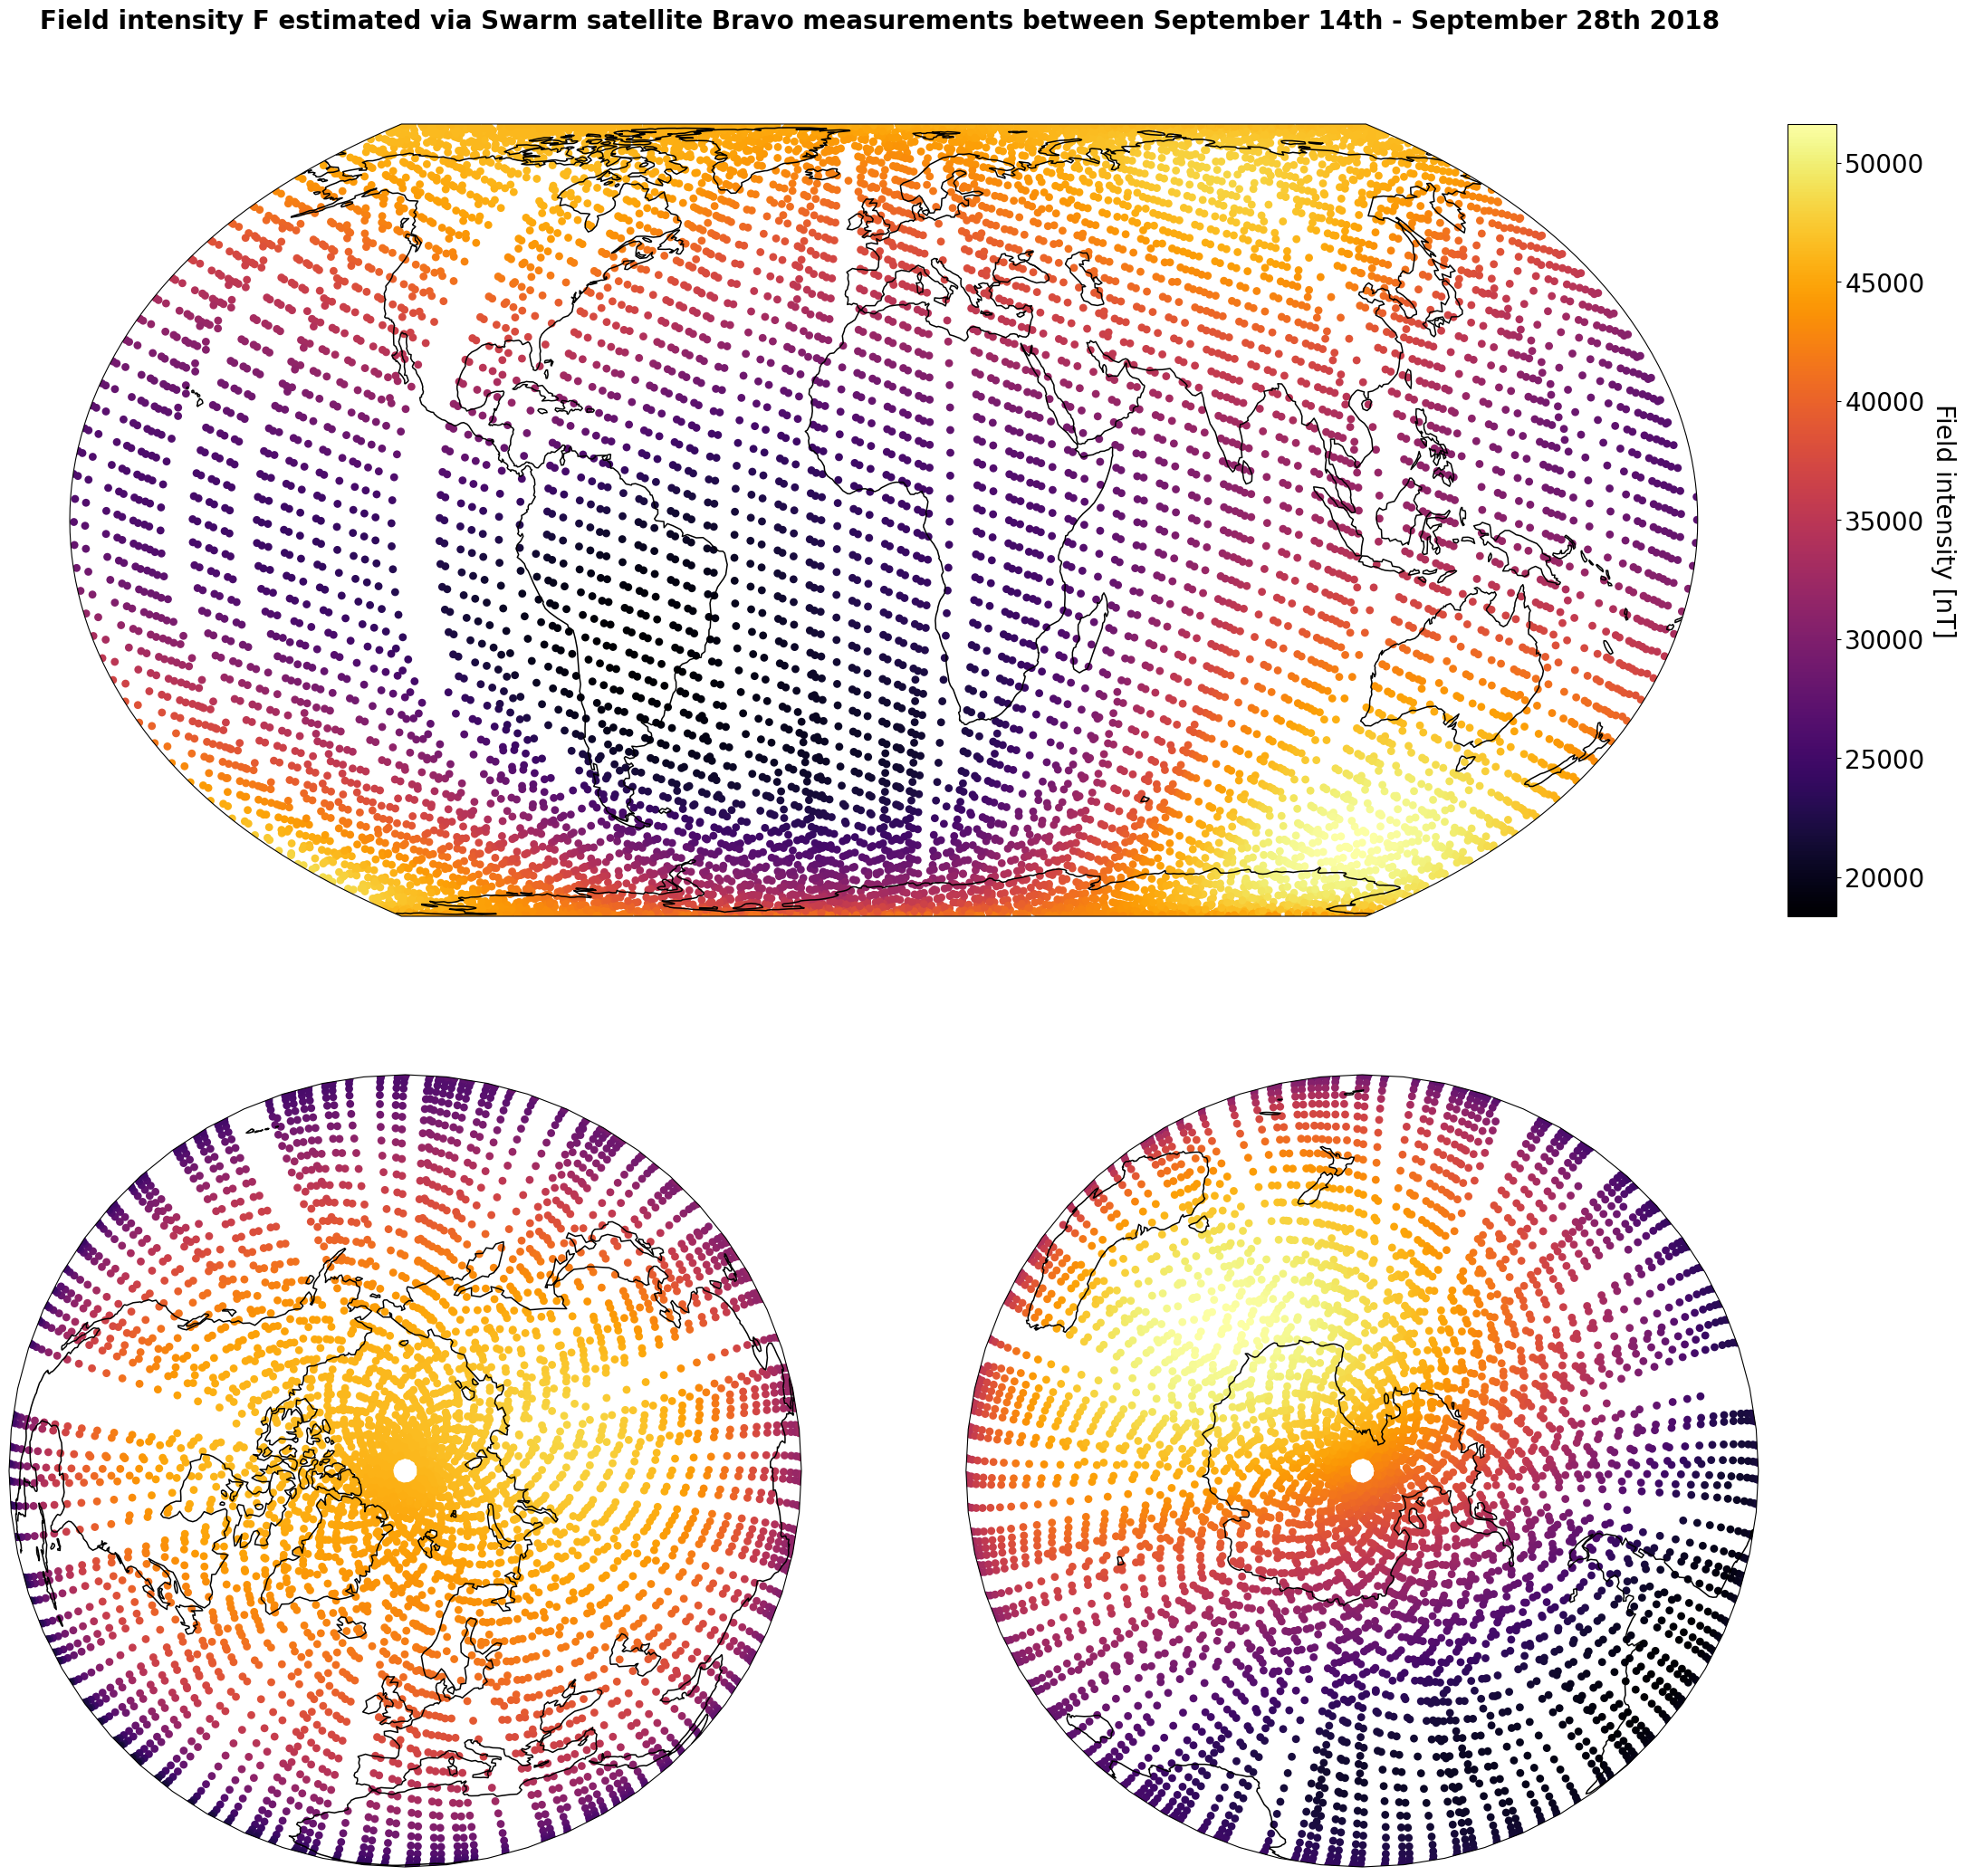

In [11]:
# Calculate field intensity and plot 
dataframe['F'] = np.sqrt(dataframe['X']**2+dataframe['Y']**2+dataframe['Z']**2);

fig = plt.figure(figsize=(25, 25))

gs = fig.add_gridspec(2, 2)

axes = []
axes.append(plt.subplot(gs[1, 0], projection=ccrs.Orthographic(0,90)))
axes.append(plt.subplot(gs[1, 1], projection=ccrs.Orthographic(180,-90)))
axes.append(plt.subplot(gs[0, :], projection=ccrs.EqualEarth()))

for ax in axes:
        pc = ax.scatter(dataframe['lon'], y=90-dataframe['colat'], s = 40, c = dataframe['F'], edgecolors='none', cmap='inferno', transform = ccrs.PlateCarree());
        ax.coastlines(linewidth=1.1);
        
# Add colorbar
    #inset axes into global map and move upwards
plt.title('Field intensity F estimated via Swarm satellite Bravo measurements between September 14th - September 28th 2018 \n \n \n', weight='bold', fontsize=20);
cax = inset_axes(axes[-1], width="3%", height="100%", loc='right',
                     borderpad=-11)

    # use last artist for the colorbar
clb = plt.colorbar(pc, cax=cax)
clb.ax.tick_params(labelsize=20)
clb.set_label('Field intensity [nT]', rotation=270, labelpad=25, fontsize=20)

# (vii) Convert to $B_r$, $B_\theta$, $B_\lambda$ and save to file for later

In [12]:
# save to selected data to file, e.g. python file or ascii 
dataframe['B_r'] = -dataframe['Z'];
dataframe['B_theta'] = -dataframe['X'];
dataframe['B_lambda'] = dataframe['Y'];

# Saves the dataframe as a file in the same directory where this current Python file is located.
dataframe.to_csv('Exercise_2_results.csv',index=False);